# OBJECTIVE:
 ### 1. APPLYING ALL FOUR VECTORIZATIONS FOR K-MEANS
 ### 2. FINDING BEST VALUE OF N_CLUSTERS USING ELBOW METHOD
 ### 3. PLOTTING OF K VALUES VS INERTIA_LOSS FOR ALL VECTORIZATION
 ### 4. REPRESENTING WORDS OF EACH CLUSTER USING WORDCLOUD LIBRARY

In [2]:
from sklearn.model_selection import train_test_split  #importing the necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import *
from sklearn import naive_bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from sklearn import *
import warnings
warnings.filterwarnings("ignore")
from gensim.models import Word2Vec
from tqdm import tqdm


In [3]:
final_processed_data=pd.read_csv("C:/Users/Mayank/Desktop/final_new_data.csv")#loading the preprocessed data  with 100k points into dataframe 

In [4]:
data=final_processed_data.sample(50000)# taking sample data

In [5]:
print("shape of our new data is ",data.shape)#printing the shape
print("data is as follows:")
print(data.head())#printing 

shape of our new data is  (50000, 2)
data is as follows:
       Score                                        CleanedText
59356      1  one cat eat everyth love food picki one much c...
81396      1  best tast honey ive ever textur light even flu...
86500      0  saw product like concept enegri bar chocol coa...
57561      1  butteri crisp terribl sweet crunchi delight ei...
16247      1  realli like regular thought would tri chocol a...


In [ ]:
vectorizer=CountVectorizer(min_df=500)#building the vertorizer with word counts equal and more then 2
train_bow=vectorizer.fit_transform(data['CleanedText'])#fitting the model on training data
print(train_bow.shape)

(50000, 626)


In [ ]:
#applying model and calculating the squared_loss for each value of k
from sklearn.cluster import KMeans
k_range=[1,2,3,4,5,6,7,8,9,10]
inertia=[]

for i in k_range:
     model=KMeans(n_clusters=i,n_jobs=-1).fit(train_bow)
     inertia.append(model.inertia_)  
    

In [ ]:
print(inertia)

In [ ]:
# Draw Loss VS K values plot
import matplotlib.pyplot as plt
plt.plot(k_range, inertia)
plt.xlabel('K-values',size=14)
plt.ylabel('inertia',size=14)
plt.title('inertia_loss VS K-values Plot\n',size=18)
plt.grid()
plt.show()

# BEST VALUE OF K IS FOUND AS 4

In [ ]:
km = KMeans(n_clusters=4, n_init=1)
y=km.fit(train_bow)

# NOW PLOTTING WORDS FOR EACH CLUSTERS 

In [ ]:
#adding words to each clusters
cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(4):
     for ind in order_centroids[i, :15]:
          if i==0:
             cluster1.append(terms[ind])
          if i==1:
             cluster2.append(terms[ind])
          if i==2:
             cluster3.append(terms[ind])
          if i==3:
             cluster4.append(terms[ind])
                          
         
         
          

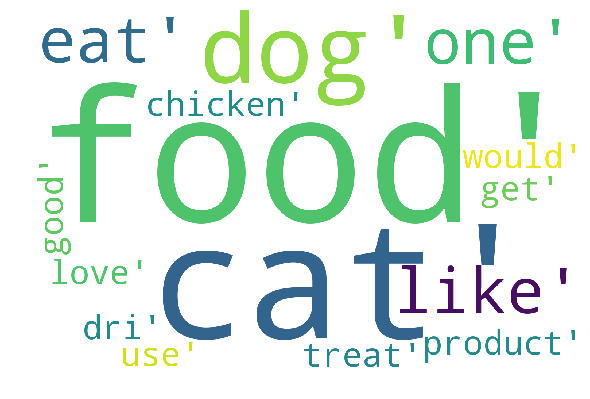

In [0]:
from wordcloud import WordCloud #here we are printing the top features of cluster 1 using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(cluster1)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# CLUSTER 1 CONTAINS WORDS RELATED TO ANIMALS NAMES LIKE CAT,DOG AND THIER PROPERTIES

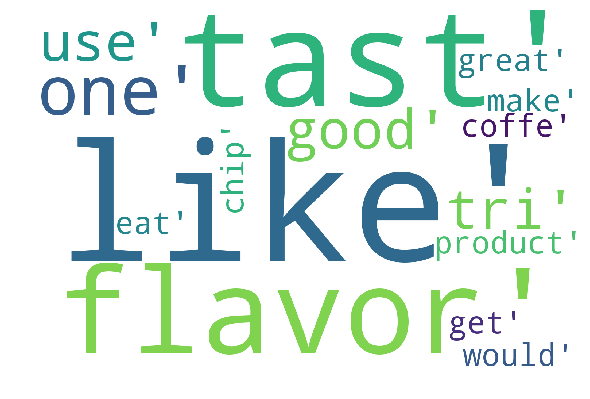

In [0]:
#here we are printing the top features for cluster 2 using wordcloud library

from wordcloud import WordCloud 
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(cluster2)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# CLUSTER 2 CONTIANS WORD RELATED TO PRODUCT ATTRIBUTES SUCH AS TASTY,LIKE

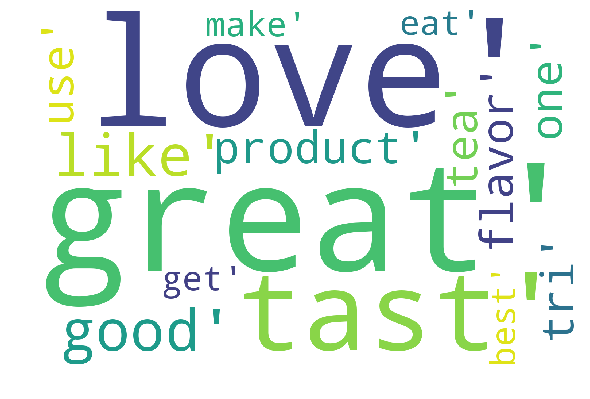

In [0]:
 #here we are printing the top features for cluster 3 using wordcloud library 
  
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(cluster3)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# CLUSTER 3 CONTAINS QUALITY OF PRODUCTS  LIKE GREAT,BEST ETC

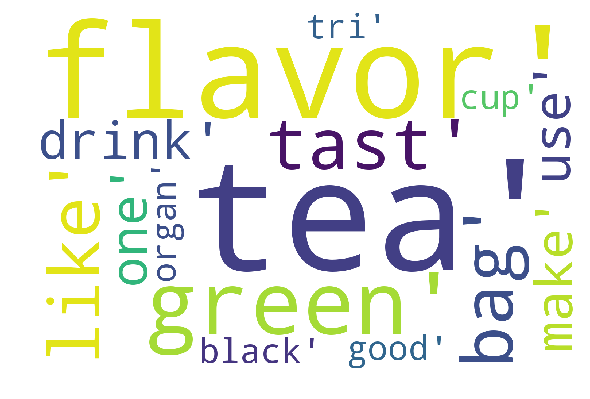

In [0]:
from wordcloud import WordCloud #here we are printing the top features for cluster 4 using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(cluster4)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# CLUSTER 4 CONTAINS COLORS NAMES SUCH AS ORANGE,BLACK,GREEN,ATTRIBURES OF PRODUCTS

# TFIDF VECTORIZATION FOR  K_MEANS ALGORITHM

In [0]:
vectorizer=TfidfVectorizer(min_df=1000)#building the vertorizer with word counts equal and more then 1000
train_tfidf=vectorizer.fit_transform(data['CleanedText'])#fitting the model on training data
print(train_tfidf.shape)

(50000, 329)


In [0]:
from sklearn.cluster import KMeans
k_range=[1,2,3,4,5,6,7,8,9,10]
inertia=[]

for i in k_range:
     model=KMeans(n_clusters=i,n_jobs=-1).fit(train_tfidf)
     inertia.append(model.inertia_)  

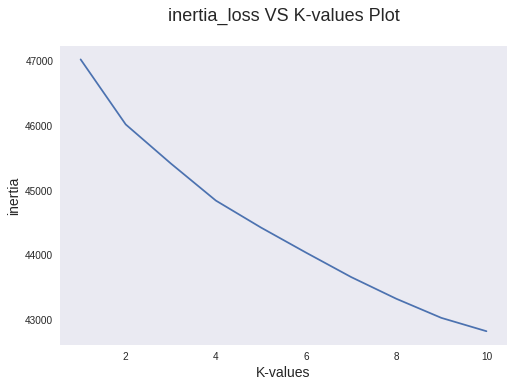

In [0]:
# Draw Loss VS K values plot
import matplotlib.pyplot as plt
plt.plot(k_range, inertia)
plt.xlabel('K-values',size=14)
plt.ylabel('inertia',size=14)
plt.title('inertia_loss VS K-values Plot\n',size=18)
plt.grid()
plt.show()

# FROM ABOVE PLOT , BEST N_CLUSTER IS FOUND AS 4

In [0]:
km = KMeans(n_clusters=4, n_jobs=-1)
y=km.fit(train_tfidf)

In [0]:
cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(4):
     for ind in order_centroids[i, :15]:
          if i==0:
             cluster1.append(terms[ind])
          if i==1:
             cluster2.append(terms[ind])
          if i==2:
             cluster3.append(terms[ind])
          if i==3:
             cluster4.append(terms[ind])
                          

 WORDS FOR CLUSTER  1  ARE AS FOLLOWS


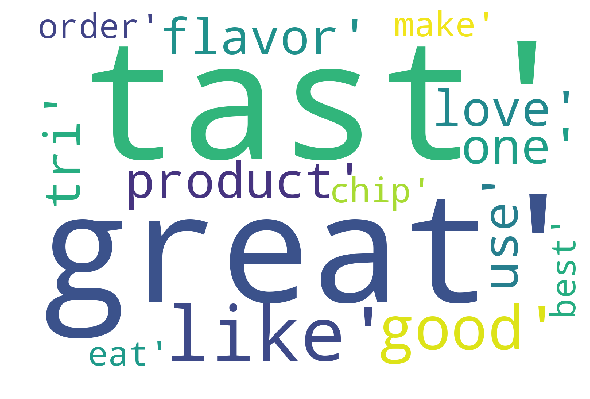

 WORDS FOR CLUSTER  2  ARE AS FOLLOWS


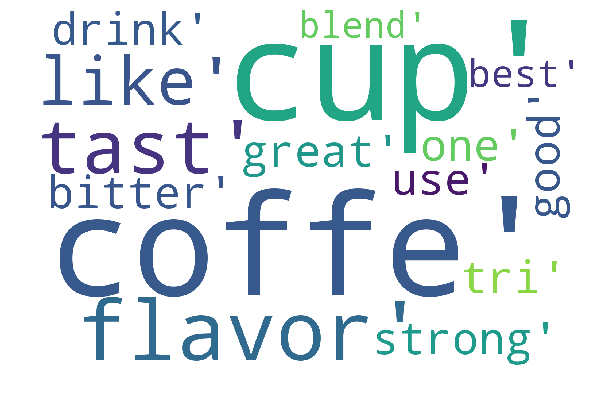

 WORDS FOR CLUSTER  3  ARE AS FOLLOWS


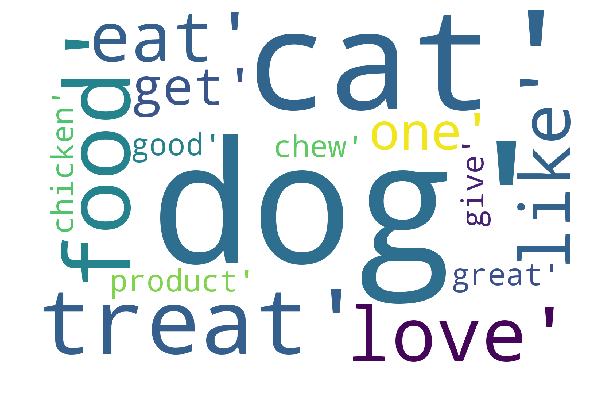

 WORDS FOR CLUSTER  4  ARE AS FOLLOWS


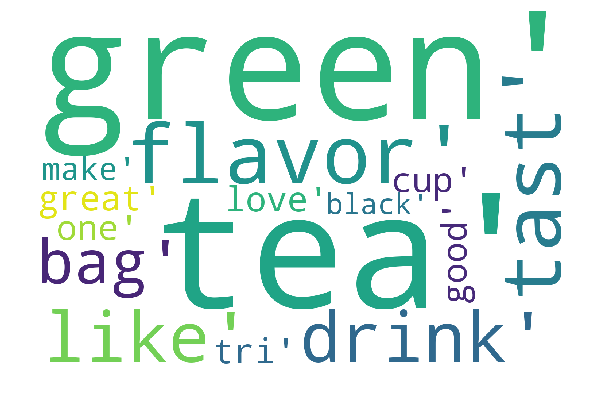

In [0]:
#PRINTING THE  WORDS FOR EACH CLUSTER USING WORDCLOUD 
cluster_list=[cluster1,cluster2,cluster3,cluster4]
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
count=1;
for i in  cluster_list:
 wordcloud = WordCloud(width = 1500, height = 1000,background_color ='white',min_font_size = 10).generate(str(i)) 
 # plot the WordCloud image
 print(" WORDS FOR CLUSTER  %d  ARE AS FOLLOWS" % count ) 
 plt.figure(figsize = (8, 8), facecolor = None) 
 plt.imshow(wordcloud) 
 plt.axis("off") 
 plt.tight_layout(pad = 0) 
 plt.show() 
 count=count+1

## CLUSTER 1 CONTAINS ATTRIBURES OF PRODUCTS LIKE BEST,GOOD,GREAT

## CLUSTER 2 CONTAINS TASTE OF PRODUCTS  LIKE BITTER,TASTY,GREAT,,FLAVOR ETC

## CLUSTER 3 CONTAINS WORDS RELATED TO ANIMALS NAMES LIKE CAT,DOG AND THIER PROPERTIES

## CLUSTER 4 CONTAINS COLORS NAMES SUCH AS ORANGE,BLACK,GREEN,ATTRIBURES OF PRODUCTS

# AVG WORD 2 VEC VECTORIZATION FOR KMEANS 

In [0]:
list_of_sent=[]
for sent in data['CleanedText'] :
 list_of_sent.append(sent.split())#splitting of sentences into words AND appending them to list
print(list_of_sent[0])
word_to_vector=Word2Vec(list_of_sent,min_count=1000,size=50,workers=3)#constructing my our word to vector
w_t_c_words=list(word_to_vector.wv.vocab)
print("***********************************************************************")
print("sample words ", w_t_c_words[0:50])

['buy', 'sourc', 'regular', 'heartili', 'recommend', 'price', 'servic', 'qualiti', 'product', 'cours', 'tiptop', 'account', 'thank']
***********************************************************************
sample words  ['buy', 'regular', 'recommend', 'price', 'qualiti', 'product', 'thank', 'sauc', 'turn', 'roast', 'whole', 'famili', 'one', 'know', 'food', 'good', 'high', 'get', 'wont', 'last', 'long', 'tri', 'mani', 'sugar', 'free', 'chocol', 'best', 'especi', 'enjoy', 'actual', 'order', 'orang', 'cream', 'bit', 'sweet', 'fast', 'great', 'compani', 'like', 'fact', 'bottl', 'expect', 'oil', 'got', 'color', 'big', 'black', 'someth', 'mayb', 'cook']


In [0]:
###### NOW STARTING AVERAGE WORD TO VEC #################################################################
train_sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
 sent_vec = np.zeros(50) # as word vectors are of zero length
 cnt_words =0; # num of words with a valid vector in the sentence/review
 for word in sent: # for each word in a review/sentence
   if word in w_t_c_words:
     vec = word_to_vector.wv[word]
     sent_vec += vec
     cnt_words += 1
 if cnt_words != 0:
  sent_vec /= cnt_words
 train_sent_vectors.append(sent_vec)
print(len(train_sent_vectors))
print(len(train_sent_vectors[0]))

100%|██████████| 50000/50000 [00:11<00:00, 4350.46it/s]

50000
50


In [0]:
#BUILDING THE MODEL
from sklearn.cluster import KMeans
k_range=[1,2,3,4,5,6,7,8,9,10]
inertia=[]

for i in k_range:
     model=KMeans(n_clusters=i,n_jobs=-1).fit(train_sent_vectors)
     inertia.append(model.inertia_)  

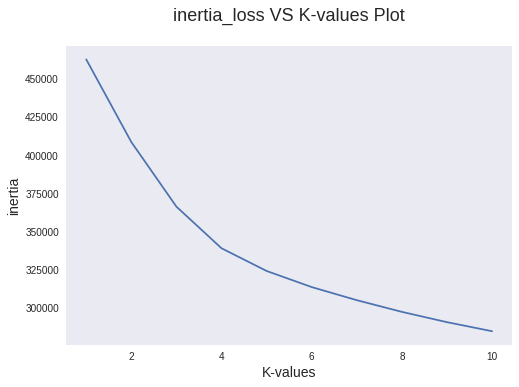

In [0]:
# Draw Loss VS K values plot
import matplotlib.pyplot as plt
plt.plot(k_range, inertia)
plt.xlabel('K-values',size=14)
plt.ylabel('inertia',size=14)
plt.title('inertia_loss VS K-values Plot\n',size=18)
plt.grid()
plt.show()

# FROM HERE BEST N_CLUSTERS VALUE IS FOUND TO AS 5

In [0]:
km = KMeans(n_clusters=5, n_jobs=-1)
y=km.fit(train_sent_vectors)

In [0]:
cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]
cluster5=[]
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(5):
     for ind in order_centroids[i, :15]:
          if i==0:
             cluster1.append(terms[ind])
          if i==1:
             cluster2.append(terms[ind])
          if i==2:
             cluster3.append(terms[ind])
          if i==3:
             cluster4.append(terms[ind])
          if i==4:
             cluster5.append(terms[ind])    

 WORDS FOR CLUSTER  1  ARE AS FOLLOWS


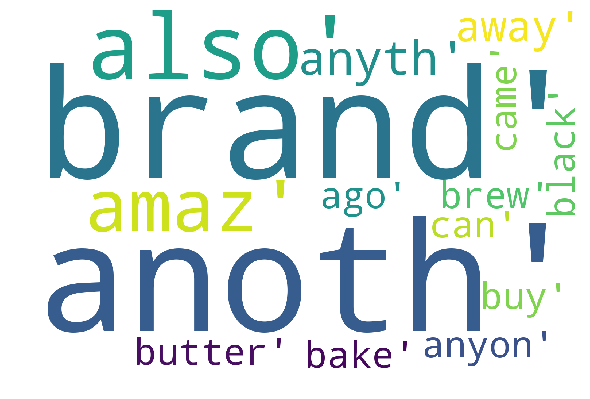

 WORDS FOR CLUSTER  2  ARE AS FOLLOWS


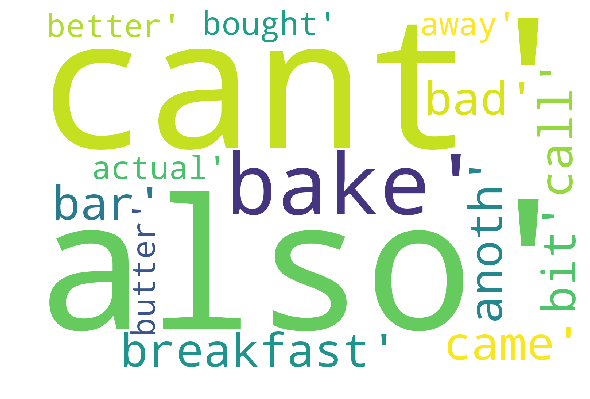

 WORDS FOR CLUSTER  3  ARE AS FOLLOWS


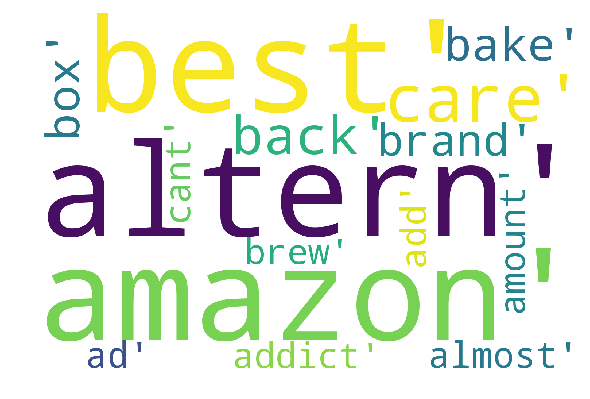

 WORDS FOR CLUSTER  4  ARE AS FOLLOWS


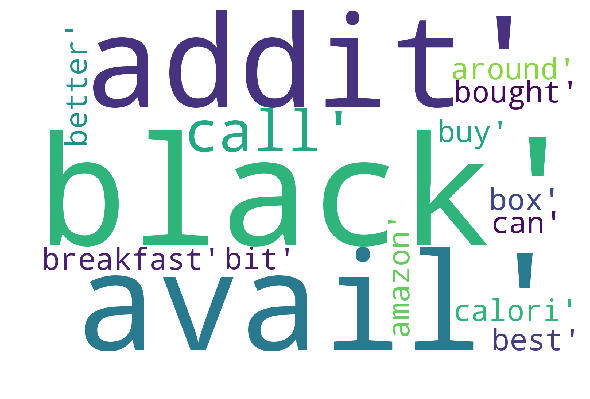

 WORDS FOR CLUSTER  5  ARE AS FOLLOWS


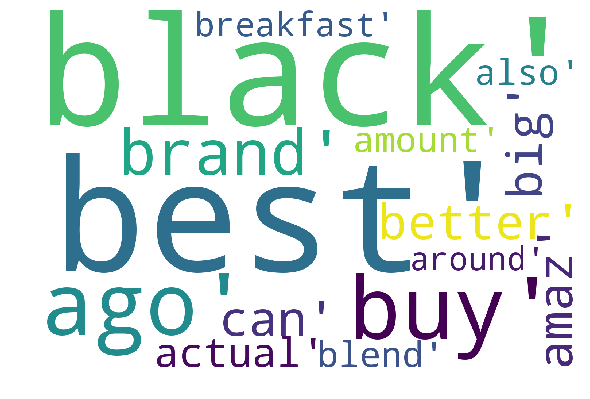

In [0]:
#PRINTING THE WORDS FOR EACH CLUSTERS USING WORDCLOUD
cluster_list=[cluster1,cluster2,cluster3,cluster4,cluster5]
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
count=1;
for i in  cluster_list:
 wordcloud = WordCloud(width = 1500, height = 1000,background_color ='white',min_font_size = 10).generate(str(i)) 
 # plot the WordCloud image
 print(" WORDS FOR CLUSTER  %d  ARE AS FOLLOWS" % count ) 
 plt.figure(figsize = (8, 8), facecolor = None) 
 plt.imshow(wordcloud) 
 plt.axis("off") 
 plt.tight_layout(pad = 0) 
 plt.show() 
 count=count+1

## CLUSTER 1 CONTAINS FOOD RELATED WORDS SUCH AS BAKE,BUTTER,BRAND

## CLUSTER 2  CONTAINS FOOD AND BEVREGES INFOMATION SUCH AS BAR,BREAKFAST

## CLUSTER 3 CONATINS ATTRIBUTES OF ITEMS  

## CLUSTER 4 CONTAINS STATE SUCH AS AVIAL,CAN,BETTER

# TFIDF WIEGHTED WORD2VECTORIZATION FOR KMEANS

In [0]:
# Training my own Word2Vec model using your own text corpus
list_of_sent=[]
for sent in data['CleanedText']:
 list_of_sent.append(sent.split())#splitting of sentences into words AND appending them to list
print(list_of_sent[0])
word_to_vector=Word2Vec(list_of_sent,min_count=1000,size=100,workers=2)#constructing my our word to vector
w_t_c_words=list(word_to_vector.wv.vocab)
print("***********************************************************************")
print("sample words ", w_t_c_words[0:20])
print("total_words ", len(w_t_c_words))

['buy', 'sourc', 'regular', 'heartili', 'recommend', 'price', 'servic', 'qualiti', 'product', 'cours', 'tiptop', 'account', 'thank']
***********************************************************************
sample words  ['buy', 'regular', 'recommend', 'price', 'qualiti', 'product', 'thank', 'sauc', 'turn', 'roast', 'whole', 'famili', 'one', 'know', 'food', 'good', 'high', 'get', 'wont', 'last']
total_words  385


In [0]:
###### NOW STARTING TFIDF WORD TO VEC FOR TRAIN DATA#################################################################
#NOW STARTING TF-IDF WEIGHTED WORD-TO-VEC
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(data['CleanedText'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))
train_tfidf_sent_vectors =[]# the tfidf-w2v for each sentence/review is stored in this list

for sent in tqdm(list_of_sent): # for each review/sentence
  sent_vec = np.zeros(100) # as word vectors are of zero length
  weight_sum =0; # num of words with a valid vector in the sentence/review
  for word in sent: # for each word in a review/sentence
   if word in w_t_c_words:
     vec = word_to_vector.wv[word]
     tf_idf = dictionary[word]*(sent.count(word)/len(sent))# dictionary[word] = idf value of word in whole courpus
     sent_vec += (vec * tf_idf)# sent.count(word) = tf valeus of word in this review
     weight_sum += tf_idf 
  if weight_sum != 0:
   sent_vec /= weight_sum
   train_tfidf_sent_vectors.append(sent_vec)

100%|██████████| 50000/50000 [00:17<00:00, 2868.12it/s]


In [0]:
from sklearn.cluster import KMeans
k_range=[1,2,3,4,5,6,7,8,9,10]
inertia=[]

for i in k_range:
     model=KMeans(n_clusters=i,n_jobs=-1).fit( train_tfidf_sent_vectors)
     inertia.append(model.inertia_)

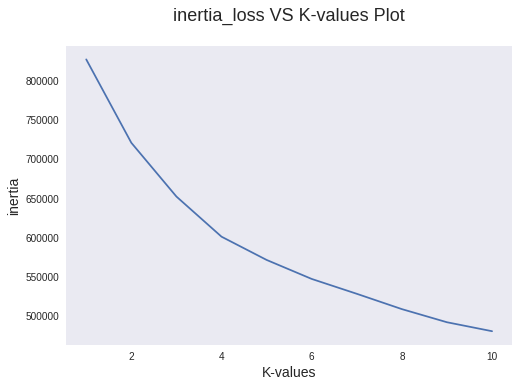

In [0]:
# Draw Loss VS K values plot
import matplotlib.pyplot as plt
plt.plot(k_range, inertia)
plt.xlabel('K-values',size=14)
plt.ylabel('inertia',size=14)
plt.title('inertia_loss VS K-values Plot\n',size=18)
plt.grid()
plt.show()

# FROM HERE BEST N_CLUSTERS VALUE IS FOUND TO AS 5

In [0]:
km = KMeans(n_clusters=5, n_jobs=-1)
y=km.fit(train_sent_vectors)

In [0]:
cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]
cluster5=[]
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(5):
     for ind in order_centroids[i, :15]:
          if i==0:
             cluster1.append(terms[ind])
          if i==1:
             cluster2.append(terms[ind])
          if i==2:
             cluster3.append(terms[ind])
          if i==3:
             cluster4.append(terms[ind])
          if i==4:
             cluster5.append(terms[ind])

 WORDS FOR CLUSTER  1  ARE AS FOLLOWS


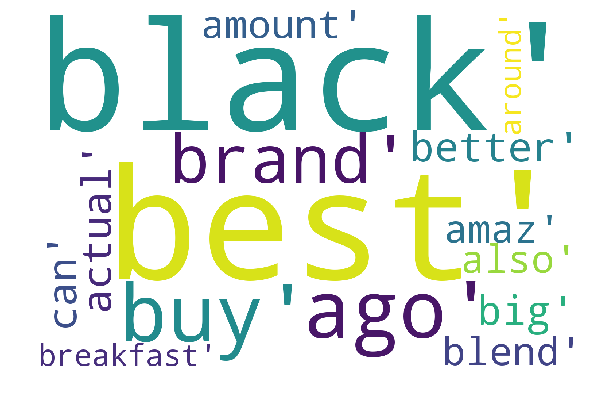

 WORDS FOR CLUSTER  2  ARE AS FOLLOWS


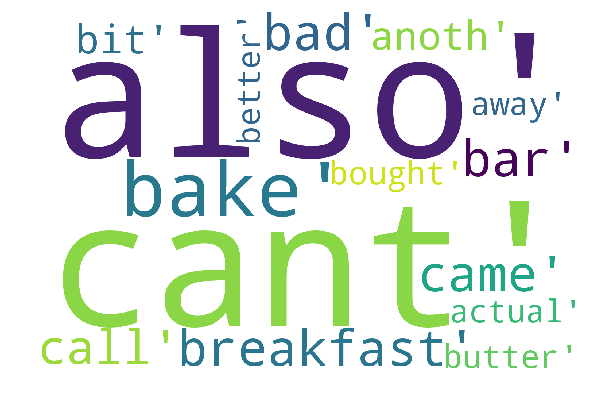

 WORDS FOR CLUSTER  3  ARE AS FOLLOWS


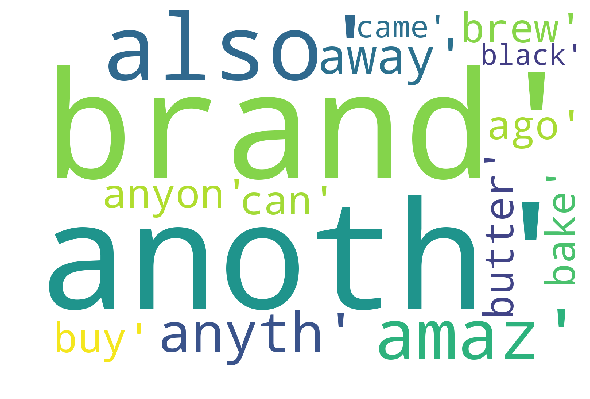

 WORDS FOR CLUSTER  4  ARE AS FOLLOWS


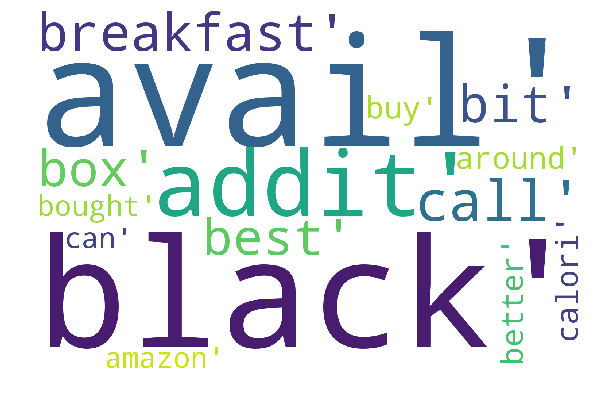

 WORDS FOR CLUSTER  5  ARE AS FOLLOWS


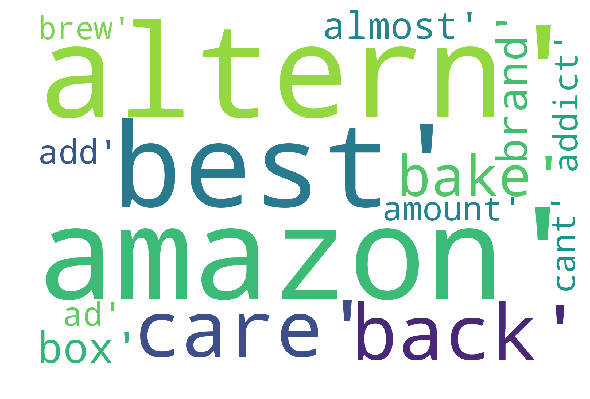

In [0]:
#PRINTING WORDS FOR EACH CLUSTERS USING WORDCLOUD LIBRARY
cluster_list=[cluster1,cluster2,cluster3,cluster4,cluster5]
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
count=1;
for i in  cluster_list:
 wordcloud = WordCloud(width = 1500, height = 1000,background_color ='white',min_font_size = 10).generate(str(i)) 
 # plot the WordCloud image
 print(" WORDS FOR CLUSTER  %d  ARE AS FOLLOWS" % count ) 
 plt.figure(figsize = (8, 8), facecolor = None) 
 plt.imshow(wordcloud) 
 plt.axis("off") 
 plt.tight_layout(pad = 0) 
 plt.show() 
 count=count+1

## CLUSTER 1 CONTAINS FOOD RELATED WORDS SUCH AS BAKE,BUTTER,BUY
## CLUSTER 2 CONTAINS FOOD AND BEVREGES INFOMATION SUCH AS BAR,BREAKFAST
## CLUSTER 3 CONATINS ATTRIBUTES OF ITEMS
## CLUSTER 4 CONTAINS STATES SUCH AS AVIAL,CAN,BETTER,ADDICT

# KMEANS FOR ALL FOUR VECTORIZATIONS IS DONE